# LOADING REQUIRED MODULES

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline

# LOADING AND VIEWING DATA

In [330]:
df= pd.read_csv(r'C:\Users\Shivam Sundram\OneDrive\Desktop\Vue\B.Engg_data.txt')
print(df.columns)
df.head(15)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_sd', 'texture_sd', 'perimeter_sd', 'area_sd', 'smoothness_sd',
       'compactness_sd', 'concavity_sd', 'concave_points_sd', 'symmetry_sd ',
       'fractal_dimension_sd', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst ', 'fractal_dimension_worst'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


# HANDLING MISSING VALUES IN THE DATA

NO. OF ROWS =  569 
NO.OF COLUMNS =  32

id ------> 0.0
diagnosis ------> 0.0
radius_mean ------> 0.049
texture_mean ------> 0.0
perimeter_mean ------> 0.0
area_mean ------> 0.072
smoothness_mean ------> 0.0
compactness_mean ------> 0.0
concavity_mean ------> 0.0
concave_points_mean ------> 0.0
symmetry_mean ------> 0.0
fractal_dimension_mean ------> 0.0
radius_sd ------> 0.0
texture_sd ------> 0.0
perimeter_sd ------> 0.0
area_sd ------> 0.0
smoothness_sd ------> 0.0
compactness_sd ------> 0.0
concavity_sd ------> 0.0
concave_points_sd ------> 0.0
symmetry_sd  ------> 0.0
fractal_dimension_sd ------> 0.0
radius_worst ------> 0.0
texture_worst ------> 0.0
perimeter_worst ------> 0.0
area_worst ------> 0.0
smoothness_worst ------> 0.0
compactness_worst ------> 0.0
concavity_worst ------> 0.0
concave_points_worst ------> 0.0
symmetry_worst  ------> 0.0
fractal_dimension_worst ------> 0.0


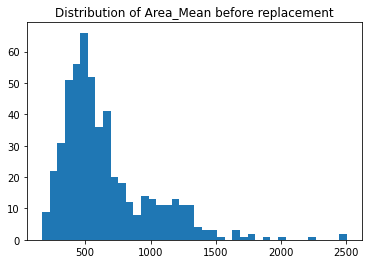

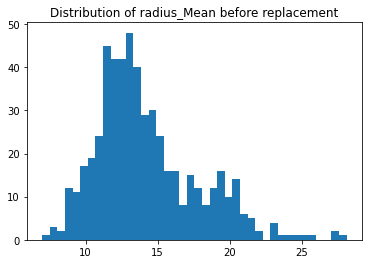

In [331]:
# Firstly lets see shape of the dataframe and proportion of data missing in each feature
print("NO. OF ROWS = ",df.shape[0],"\nNO.OF COLUMNS = ",df.shape[1])
print()

# printing fraction of Missing values in each column
for i in df.columns:
    print(i,"------>",round(df.loc[:,i].isnull().sum()/df.shape[0],3))

# getting the original data distribution
plt.hist(df["area_mean"],bins=40)
plt.title("Distribution of Area_Mean before replacement")
plt.show()

plt.hist(df["radius_mean"],bins=40)
plt.title("Distribution of radius_Mean before replacement")
plt.show()

## OBSRVATION : about 4.9% data is missing in radius_mean and about 7.3% data missing in area_mean 

# DERIVING APPROACHES FOR FILLING MISSING DATA  

In [332]:
# replacing the missing values by median of the data the dataframe
df["area_mean"].fillna(df["area_mean"].median(),inplace=True)
df["radius_mean"].fillna(df["radius_mean"].median(),inplace=True)

# checking for missing values in the data
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_sd                  0
texture_sd                 0
perimeter_sd               0
area_sd                    0
smoothness_sd              0
compactness_sd             0
concavity_sd               0
concave_points_sd          0
symmetry_sd                0
fractal_dimension_sd       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# DISTRIBUTION OF FEATURES IN THE DATAFRAME


# GRAPHICAL SUMMARY:

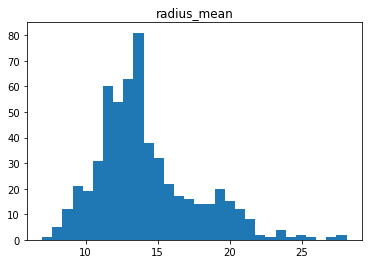

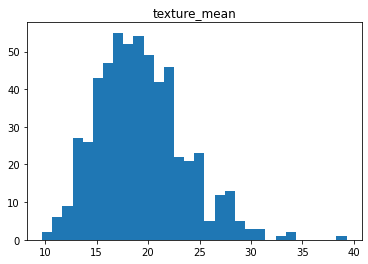

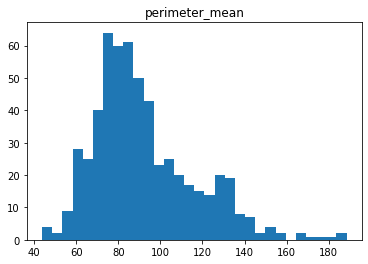

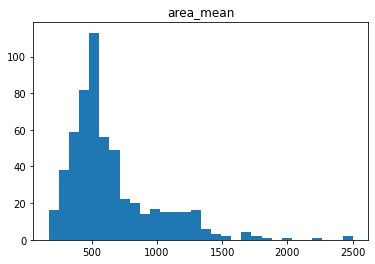

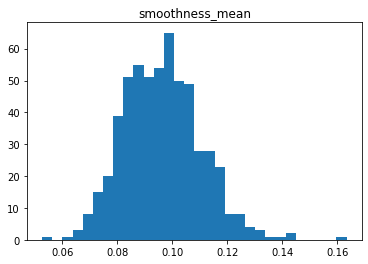

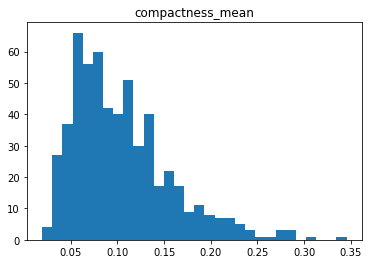

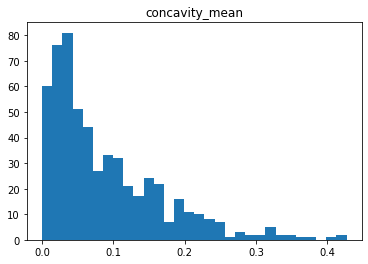

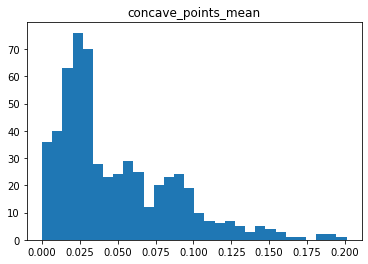

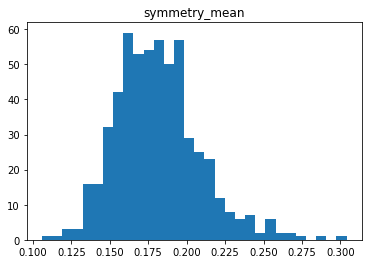

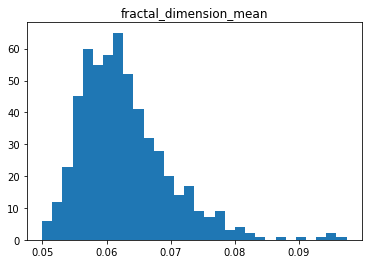

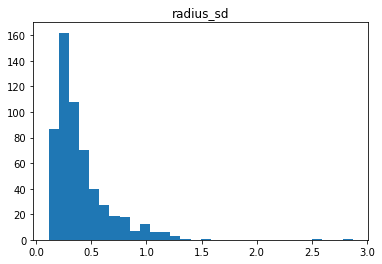

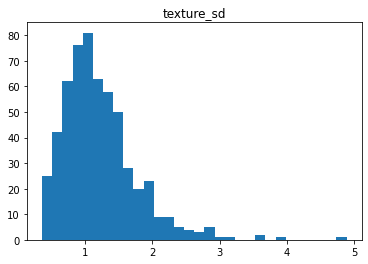

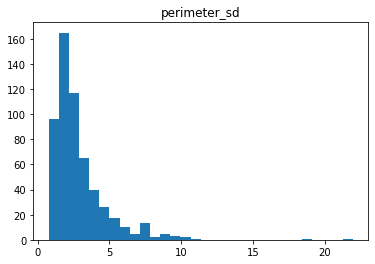

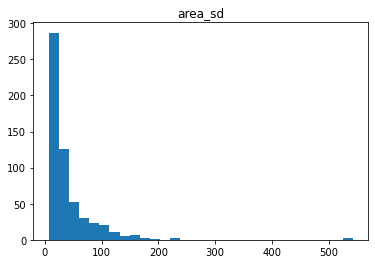

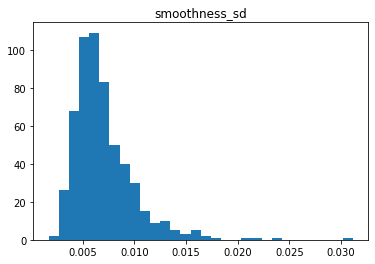

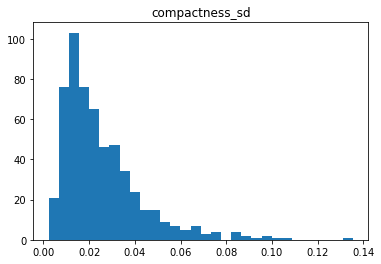

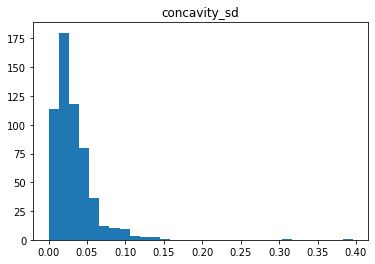

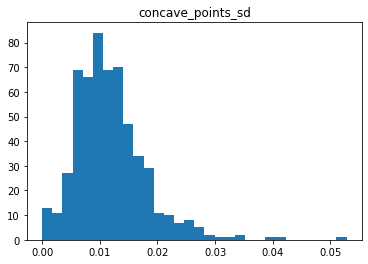

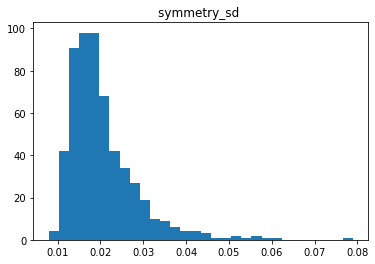

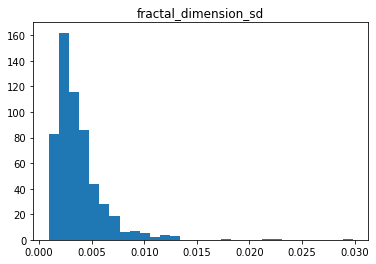

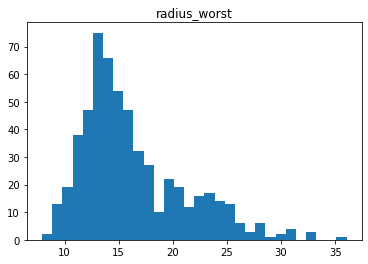

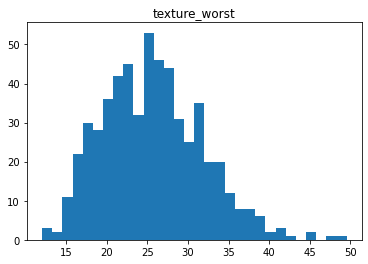

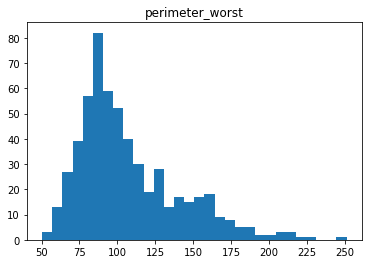

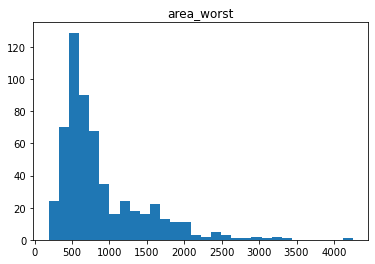

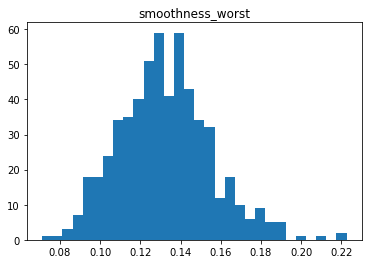

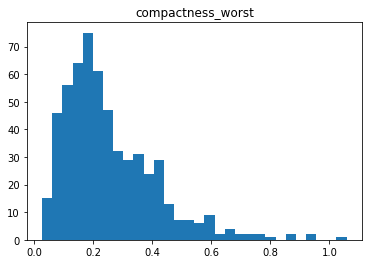

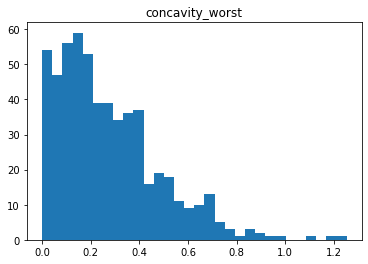

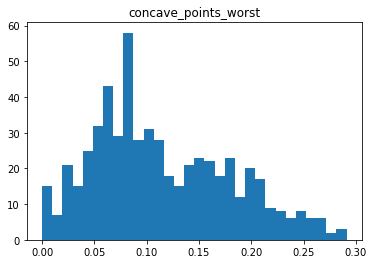

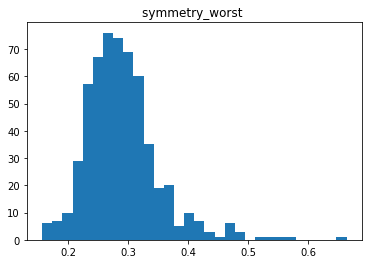

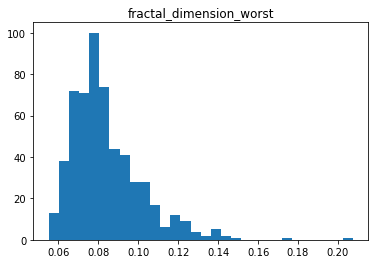

In [333]:
for i in range(2,df.shape[1]):
    plt.hist(df[df.columns[i]],bins=30)
    plt.title(df.columns[i])
    plt.show()


HEAT MAP OF CORRELATION BETWEEN COLUMNS :


<AxesSubplot:>

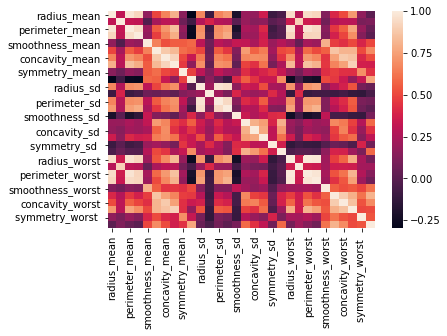

In [334]:
print("HEAT MAP OF CORRELATION BETWEEN COLUMNS :")
sns.heatmap(df.iloc[:,2:].corr())

# STATISTICAL SUMMARY:

In [335]:
df.iloc[:,2:].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.137253,19.289649,91.969033,652.053251,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.443406,4.301036,24.298981,339.574696,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.840000,16.170000,75.170000,432.000000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.400000,18.840000,86.240000,555.900000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.710000,21.800000,104.100000,758.600000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [336]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.050139,0.099770,0.073159,0.101456,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.050139,1.000000,0.312501,0.976329,0.928572,0.170688,0.496437,0.660795,0.805404,0.151380,...,0.952252,0.286668,0.947943,0.927962,0.123640,0.404558,0.512577,0.726984,0.168603,0.011911
texture_mean,0.099770,0.312501,1.000000,0.329533,0.313797,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.976329,0.329533,1.000000,0.947427,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.101456,0.928572,0.313797,0.947427,1.000000,0.177721,0.475593,0.660454,0.787600,0.138946,...,0.926470,0.281303,0.921462,0.925757,0.126969,0.377396,0.496874,0.693095,0.135304,0.005801
smoothness_mean,-0.012968,0.170688,-0.023389,0.207278,0.177721,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.496437,0.236702,0.556936,0.475593,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.660795,0.302418,0.716136,0.660454,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.805404,0.293464,0.850977,0.787600,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.151380,0.071401,0.183027,0.138946,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# SCALING THE DATASET


In [337]:
# Just by observing we can see that the data is not all on same scake so there is need to scale them
scaler = StandardScaler()
X=df.iloc[:,2:]                              #assign dataframe numerical columns to X
X=scaler.fit_transform(X)                    #standardizing X     
X=pd.DataFrame(X,columns=[df.columns[2:]])   
df.iloc[:,2:]=X                              #replacing the numerical columns of dataframe by transformed X
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.119861,-2.073335,1.269934,1.028504,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.869779,-0.353632,1.685955,1.986425,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.613993,0.456187,1.566503,1.623889,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.214294,0.253732,-0.592687,-0.283407,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.788392,-1.151816,1.776573,1.900949,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# WHY ITS IMPORTANT TO SCALE DATA

### Its quite intuitive that the difference of 5 and 4 in the scale of 10 is same as difference of 50 and 40 in scale of 100 which is same as 500 and 600 in the scale of 1000 and so on.. but if we see it in a unified scale we observe that the numbers bigger have superiority of some sort which in actuality is not there just the scales are different , Most of the machine learning models treat every number in the same scale so for features having a greater numerical values get a unnecessary superiority , by scaling we can prevent this common mishap  


# PCA 

In [338]:
# transforming the categorical diagnosis variable to numerical by the rule B-->0 and M--->1
for i in range(df.shape[0]):
    if df.iloc[i,1]=="M":
        df.iloc[i,1]=1 
    else:
        df.iloc[i,1]=0
X=df.iloc[:,2:]         # X is a replica of the original df which has columns having numerical values

In [339]:
df.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.119861,-2.073335,1.269934,1.028504,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.869779,-0.353632,1.685955,1.986425,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.613993,0.456187,1.566503,1.623889,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.214294,0.253732,-0.592687,-0.283407,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.788392,-1.151816,1.776573,1.900949,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,843786,1,-0.490427,-0.835335,-0.387148,-0.515666,2.237421,1.244335,0.866302,0.824656,...,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,844359,1,1.195434,0.160649,1.138125,1.143454,-0.123136,0.088295,0.300072,0.646935,...,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,84458202,1,-0.124188,0.358450,-0.072867,-0.218563,1.604049,1.140102,0.061026,0.281950,...,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,844981,1,-0.330560,0.588830,-0.184080,-0.389810,2.201839,1.684010,1.219096,1.150692,...,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,84501001,1,-0.487520,1.105439,-0.329482,-0.519203,1.582699,2.563358,1.738872,0.941760,...,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


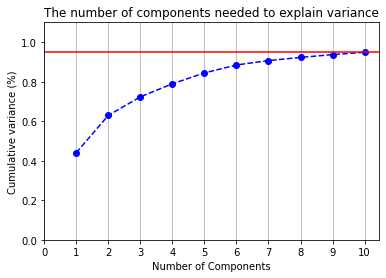

In [340]:
pca = PCA().fit(X)
fig, ax = plt.subplots()
xi = np.arange(1,11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)[:10]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.show()

### SO ITS CLEAR FROM ABOVE CURVE THAT WE NEED 10 COMPONENTS TO EXPLAIN 95% data

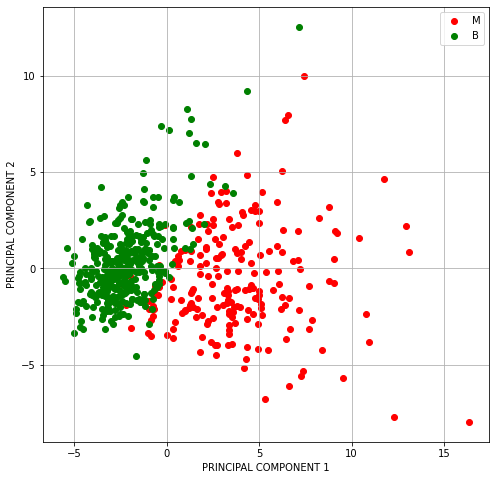

In [341]:
# transforming the dataframe X in 2 principal components

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#combining the transformed data with the diagnosis class label 
finalDf=pd.concat([principalDf, df[['diagnosis']]], axis = 1)


# seperating out the datapoints of each class and plotting on same fig. with different colors
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(569):
    if finalDf.loc[i,"diagnosis"]==1:
        x1.append(finalDf.loc[i,"principal component 1"])
        y1.append(finalDf.loc[i,'principal component 2'])
    else:
        x2.append(finalDf.loc[i,"principal component 1"])
        y2.append(finalDf.loc[i,'principal component 2'])
        
targets=["M","B"]
ax.scatter(x1,y1,color="r")
ax.scatter(x2,y2,color="g")
plt.xlabel("PRINCIPAL COMPONENT 1")
plt.ylabel("PRINCIPAL COMPONENT 2")
ax.legend(targets)
ax.grid()

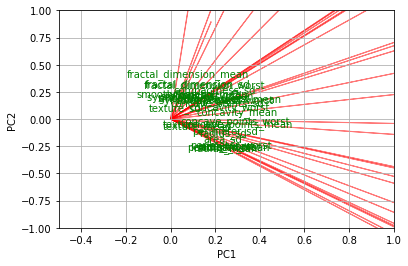

In [342]:
# generating loading plot

    
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    n=coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*10, coeff[i,1]*10,color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15,X.columns[i], color = 'g', ha = 'center', va = 'center')
        
    plt.xlim(-0.5,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))


# SUMMARY :

* FIRSTLY WE DID PCA AND OBSERVED THAT IT TOOK ABOUT 10 PRINCIPAL COMPONENTS TO EXPLAIN 95% OF THE TOTAL DATA VARIANCE WITH THE MOST VARIANCE EXPLAINED BY PRINCIPAL COMPONENT 1 WHICH IS ABOUT 45%.


* THE DATASET HAS VERY LARGE NUMBER OF DATASETS AND BY REDUCING THE DIMENSION TO 2 WE FOUND A WELL CLUSTERED SCATTER PLOT FOR EASILY DISTINGUISHING BETWEEN TWO CLASSES i.e. 'B' AND 'M'. FROM THE PCA IT APPEARS FROM THE TWO PRINCIPAL COMPONENTS  THAT THE DECISION BOUNDARY CAN EVEN BE LINEAR AS THE DATA POINTS ARE VERY CLEARLY SEPERATED ON THESE TWO AXES. 


* FROM THE LOADING PLOT WE OBSERVE ALMOST ALL OF THE LINES ARE MORE INCLINED ON x AXIS WHICH IS JUSTIFIED BY THE FACT THAT IT IS THE AXES OF 1ST PRINCIPAL AXES AND THUS GREATER VARIANCE IS EXPLAINED ACROSS IT.



# LOGISTIC REGRESSION

In [343]:
# excluding column-"id" from our analysis
a=df.columns[1:]
df=df.loc[:,a]               
X=df.iloc[:,1:]
y=df.iloc[:,0]
X.shape

(569, 30)

# DETECTING AND FIXING MULTICOLLINEARITY

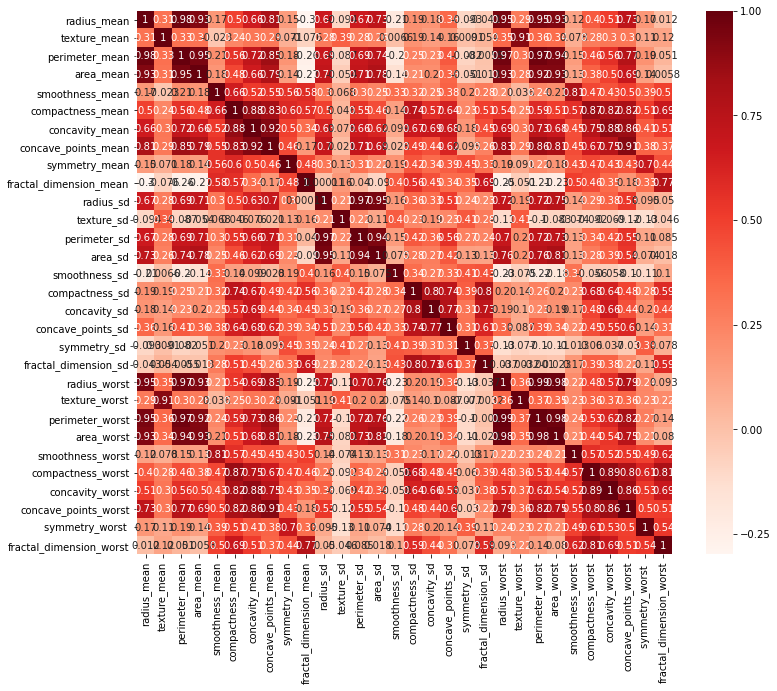

In [344]:
# Let us observe the corr heatmap again

plt.figure(figsize=(12,10))
cor = df.iloc[:,1:].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# The results show their exists region of high correlation among variables 



## ITS QUITE INTUITIVE FROM THE ABOVE HEATMAP THAT THERE ARE FEATURES WHICH ARE CORRELATED WITH EACH AND THUS IT BECOMES IMPORTANT FOR US TO SELECT ONLY THOSE FEATURES WHICH ARE LESS CORRELAED WITH EACH OTHER. THE REGRESSION MODELS AIM TO FIND THE COFFICIENT OF EACH VARIABLE IN THE MODEL WHICH IMPLIES THE CHANGE IN THE DEPENDENT VARIABLE WITH THE CHANGE IN ONE INDEPENDENT VARIABLE KEEPING ALL THE OTHER INDEPENDENT FEATURES CONSTANT BUT IF THE FEATURES ARE CORRELATED AMONGST EACH OTHER THEN CHANGING ONE VARIABLE KEEPING ALL THE OTHER CONSTANT IS NOT POSSIBLE AS FOR CORRELATED VARIABLES THERE WILL BE SOME CORRELATED CHANGE CORRESONDING TO CHANGE IN THE OTHER WHICH WILL LED TO UNSTABLE COFFICIENTS MEANING VERY SENSITIVE TO EVEN VERY SMALL CHANGES
                                                                          




## CHOOSING THE BEST SET OF FEATURES:

In [345]:
# First we compare the correlation between features and remove one of two features that have a correlation higher than 0.9


corr=X.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
X= X[selected_columns]
print("after removing correlated columns with corr>0.9 no. of features = ",X.shape[1])

#we build a small regression model and assume the null hypothesis is that the selected combination of dependent variables do not have any effect on the independent variable”.
#Then  and calculate the p values If the p values is higher than the threshold, we discard that combination of features. 

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(X.iloc[:,1:].values,X.iloc[:,0].values, SL, selected_columns)

print("total no. of features selected = ",len(selected_columns))

after removing correlated columns with corr>0.9 no. of features =  20
total no. of features selected =  13


In [346]:
# FINAL Dataframe X selecting the best features 

X=X.loc[:,selected_columns] 
X.head()


,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,smoothness_sd,compactness_sd,concave_points_sd,symmetry_sd,fractal_dimension_sd,smoothness_worst,concavity_worst,fractal_dimension_worst
0,1.568466,3.283515,2.652874,2.217515,2.255747,-0.214002,1.316862,0.660820,1.148757,0.907083,1.307686,2.109526,1.937015
1,-0.826962,-0.487072,-0.023846,0.001392,-0.868652,-0.605351,-0.692926,0.260162,-0.805450,-0.099444,-0.375612,-0.146749,0.281190
2,0.942210,1.052926,1.363478,0.939685,-0.398008,-0.297005,0.814974,1.424827,0.237036,0.293559,0.527407,0.854974,0.201391
3,3.283553,3.402909,1.915897,2.867383,4.910919,0.689702,2.744280,1.115007,4.732680,2.047511,3.394275,1.989588,4.935010
4,0.280372,0.539340,1.371011,-0.009560,-0.562450,1.483067,-0.048520,1.144205,-0.361092,0.499328,0.220556,0.613179,-0.397100


In [347]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# BUILDING THE MODEL


In [348]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [349]:
#accuracy

score = clf.score(X_test, y_test)
print("Accuracy of our model is =",score*100,"%")

Accuracy of our model is = 93.85964912280701 %


In [350]:
#confusion matrix

confusion_matrix(y_test, y_pred)

array([[70,  1],
       [ 6, 37]], dtype=int64)

In [351]:
print("roc-auc score is",roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

roc-auc score is 0.9862430396331476
